提取特征，保存到文件

In [1]:
import sys
sys.path.append('/data0/tianjunchao/code/Tian-EEG-Image/')
import torch
from datasets.eegdataset import GeneralEEGImageDataset

from torch.utils.data import DataLoader


from utils.eegutils import get_test_setting
from matplotlib import pyplot as plt
import numpy as np
import os

from sklearn.decomposition import PCA
# import tsne

import models.resnet as resnet
import torch.nn as nn
data_path = '/data0/tianjunchao/dataset/CVPR2021-02785/data/img_pkl/32x32'

from utils.eegutils import get_device

dataset = GeneralEEGImageDataset(path=data_path, n_channels=1, grid_size=8)
# dataset = get_test_setting(dataset)
train_loader = DataLoader(dataset, batch_size=128)
device = get_device(0)

In [2]:

# 分批次提取特征，用pca降维为50维度，然后用tsne降维为2维度
from sklearn.manifold import TSNE


def get_tsne_features(features, labels):

    pca = PCA(n_components=50)
    features = pca.fit_transform(features)
# features to float
    # features = features.astype(np.float32)
    tsne = TSNE(verbose=1,learning_rate='auto',init='pca')
    features = tsne.fit_transform(features)
    return features

resnet18
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.001s...
[t-SNE] Computed neighbors for 2048 samples in 6.349s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 2.039282


/data0/tianjunchao/anaconda3/envs/tian/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.529747
[t-SNE] KL divergence after 1000 iterations: 1.863722
resnet34
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.001s...
[t-SNE] Computed neighbors for 2048 samples in 6.256s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 2.805465


/data0/tianjunchao/anaconda3/envs/tian/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.428017
[t-SNE] KL divergence after 1000 iterations: 1.913059
resnet50
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.001s...
[t-SNE] Computed neighbors for 2048 samples in 0.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 1.332818


/data0/tianjunchao/anaconda3/envs/tian/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.259537
[t-SNE] KL divergence after 1000 iterations: 1.713749
resnet101
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.001s...
[t-SNE] Computed neighbors for 2048 samples in 0.585s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 2.120736


/data0/tianjunchao/anaconda3/envs/tian/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.077240
[t-SNE] KL divergence after 1000 iterations: 1.753317
resnet152
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2048 samples in 0.001s...
[t-SNE] Computed neighbors for 2048 samples in 0.290s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2048
[t-SNE] Computed conditional probabilities for sample 2000 / 2048
[t-SNE] Computed conditional probabilities for sample 2048 / 2048
[t-SNE] Mean sigma: 1.609694


/data0/tianjunchao/anaconda3/envs/tian/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.207428
[t-SNE] KL divergence after 1000 iterations: 1.796926


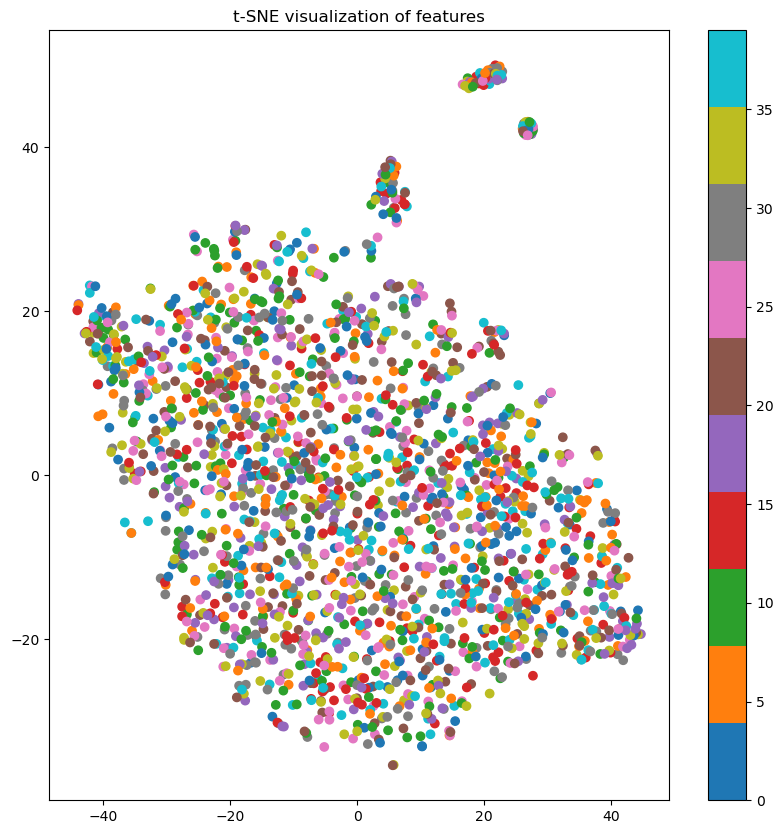

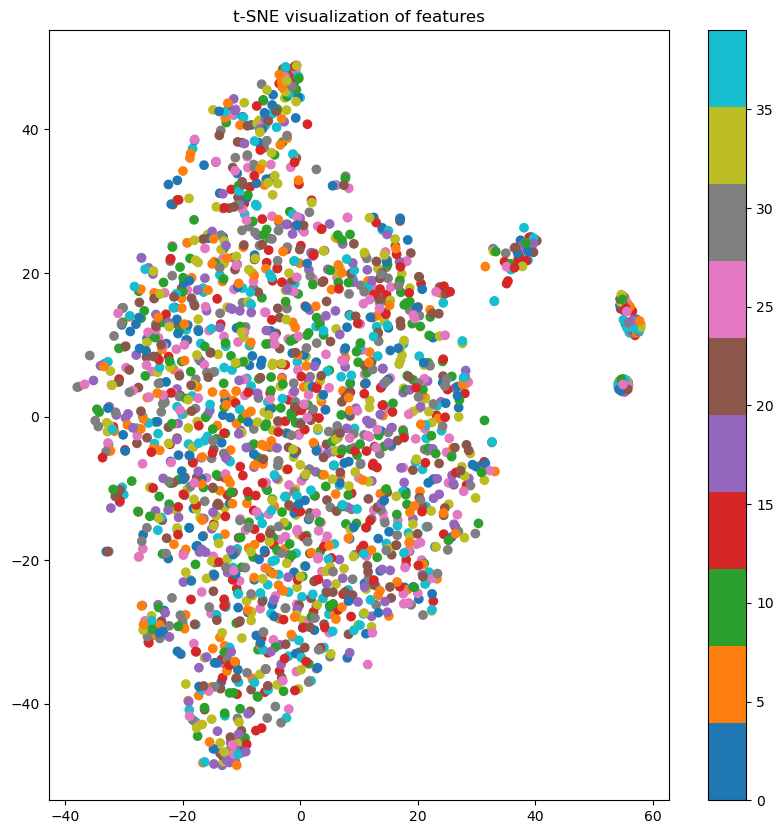

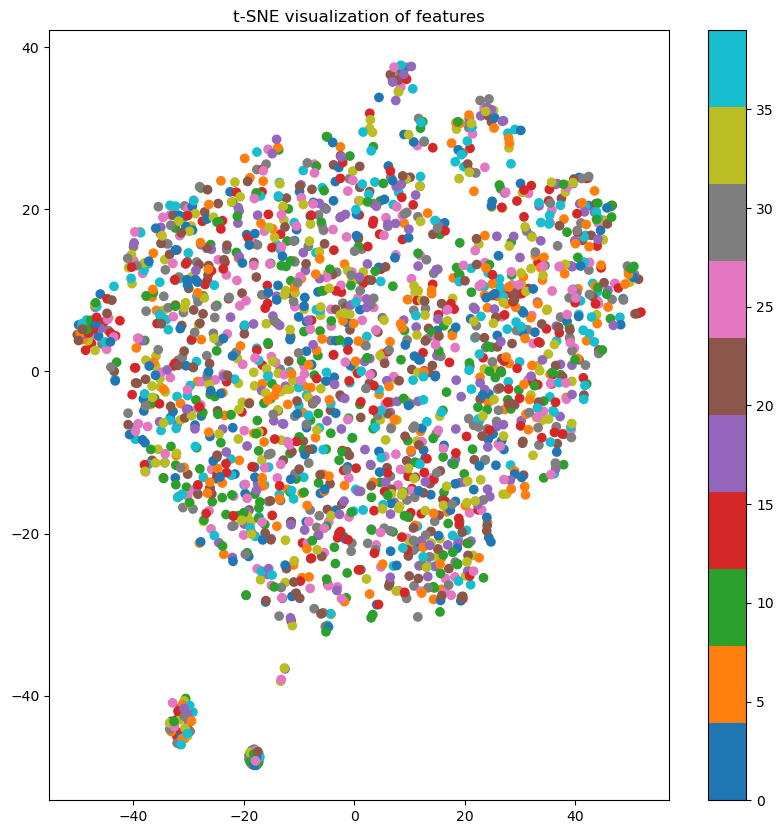

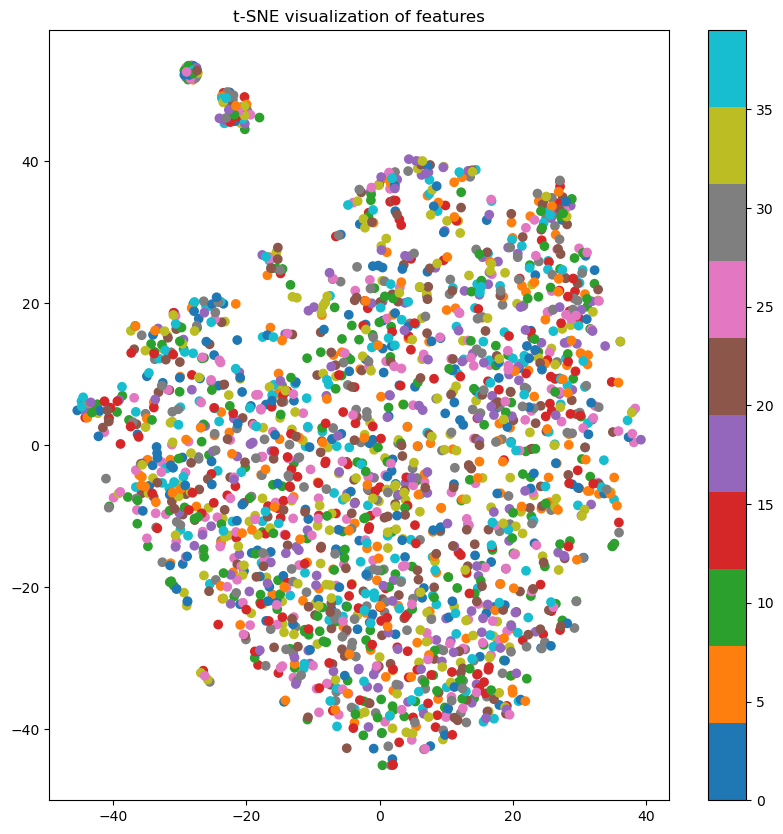

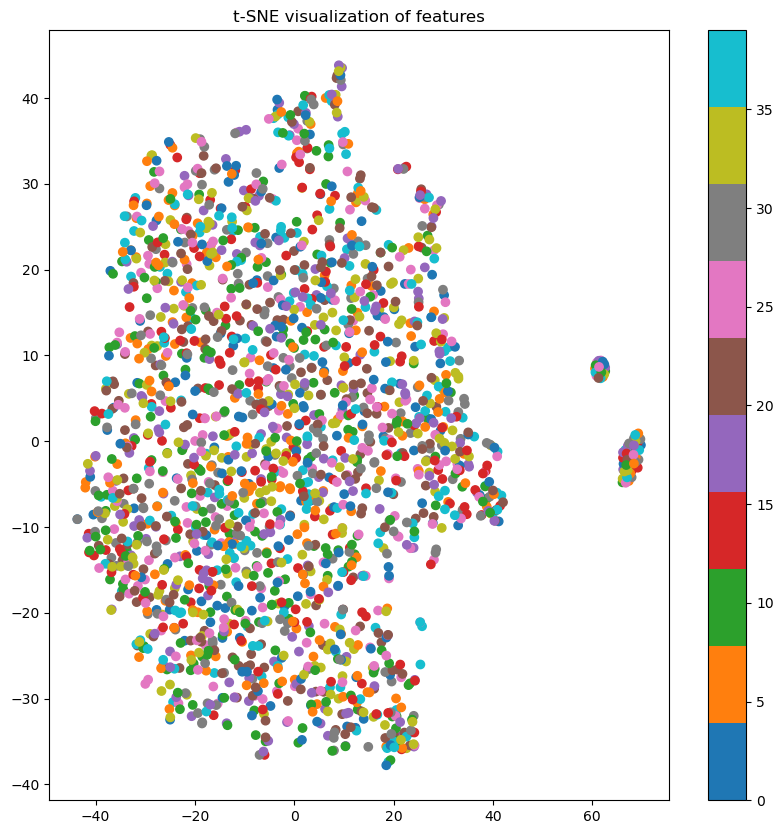

In [3]:
# list names of resnet models
model_list = [resnet.resnet_name_A,resnet.resnet_name_B,resnet.resnet_name_C,resnet.resnet_name_D,resnet.resnet_name_E]
# feature_list = np.array([])*5
# label_list = np.array([])*5
# current_model = 0
material_dir = "4.materials"

for model_name in model_list:
    model = list(resnet.ResNet(num_classes=40,model_name=model_name, pretrained=True).children())[0]
    feature_extractor = nn.Sequential(*list(model.children())[:-1])
    # .to(device)
    feature_extractor.eval() 
    print(model_name)
    feature_stack = []
    label_stack = []
    
    for inputs, labels in train_loader:
        # to device
        # inputs = inputs.to(device)
        
        # extract features from model
        with torch.no_grad():
            features = feature_extractor(inputs).squeeze()
            feature_stack.append(features)

            label_stack.append(labels)
            # concatenate features and labels
            
            if len(feature_stack) > 15:
                break
    feature_list = torch.cat(feature_stack, dim=0)
    label_list = torch.cat(label_stack, dim=0)
    tsne_features = get_tsne_features(feature_list, label_list)
    
    # plot tsne and save image
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=label_list, cmap='tab10')
    plt.colorbar()
    plt.title('t-SNE visualization of features')
    # save image
    img_dir = material_dir+'/'+model_name+'/'
    if not os.path.exists(img_dir):
        os.makedirs(img_dir)
    plt.savefig(img_dir+ 'tsne.png')
    # plt.show()
    


    # 分批次提取特征，用pca降维为50维度，然后用tsne降维为2维度
    





    # loop over data and extract features
    # features_list = []
    # labels_list = []
    
    # features_dir = material_dir+'/'+model_name+'/'
    # labels_dir = material_dir+'/'+model_name+'/'
    # if not os.path.exists(features_dir):
    #     os.makedirs(features_dir)
    # if not os.path.exists(labels_dir):
    #     os.makedirs(labels_dir)

    # features_file_name = features_dir+'features.npy'
    # labels_file_name = labels_dir+'labels.npy'

    # with open(features_file_name, 'w') as features_file, open(labels_file_name, 'w') as labels_file:
    

        # features_file.write(features + '\n')
        # labels_file.write(labels + '\n')
        # print(features.shape, labels.shape)
            
            # append features and labels to lists
            # features_list.append(features.cpu().numpy())
            # labels_list.append(labels.cpu().numpy())

        # concatenate the features and labels
        # features = np.concatenate(features_list, axis=0)
        # labels = np.concatenate(labels_list, axis=0)

        # save the features and labels to files
        # np.save(file_name+'/'+model_name+'/'+'features.npy', features)
        # np.save(file_name+'/'+model_name+'/'+'labels.npy', labels)